<a href="https://colab.research.google.com/github/Phuc0417/AI_2023/blob/main/CNN_Model_Banknotes_Vietnamese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import library
import pandas as pd
import numpy as np
from os import listdir
from numpy import asanyarray, save
from keras.utils import load_img, img_to_array
from numpy.core.multiarray import asarray
from google.colab import drive
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
folder = '/content/drive/MyDrive/AI/bank_VN/Banknotes_Train/'
photos, labels = list(), list()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
for file in listdir(folder):
  output = 0.0
  if file.startswith('5k'):
    output = 1.0
  if file.startswith('10k'):
    output = 2.0
  if file.startswith('20k'):
    output = 3.0
  if file.startswith('50k'):
    output = 4.0 
  if file.startswith('100k'):
    output = 5.0
  if file.startswith('500k'):
    output = 6.0
  photo = load_img(folder+file, target_size = (60,30))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)


In [5]:
# Convert list photos, labels to Numpy
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

(185, 60, 30, 3) (185,)


In [6]:

# Save data after preprocessing data
save('/content/drive/MyDrive/AI/bank_VN/afterpreprocessing/VN_banknotes_photos.npy', photos)
save('/content/drive/MyDrive/AI/bank_VN/afterpreprocessing/VN_banknotes_labels.npy', labels)

In [7]:
# Read data
photos = np.load('/content/drive/MyDrive/AI/bank_VN/afterpreprocessing/VN_banknotes_photos.npy')
labels = np.load('/content/drive/MyDrive/AI/bank_VN/afterpreprocessing/VN_banknotes_labels.npy')

In [8]:
# Import library
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

In [9]:
# Chuẩn hóa dữ liệu
x_train = photos.astype('float32')/255
y_train = labels
y_train = to_categorical(y_train, num_classes=7)

In [10]:
# Import library training model
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam
from keras.layers.serialization import activation
from keras.losses import categorical_crossentropy

In [11]:
# Define model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(60, 30, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(7, activation='softmax'))

In [12]:
# Compile and Train model
model.compile(loss = categorical_crossentropy,
              optimizer = Adam(),
              metrics = ['accuracy'])
train = model.fit(x_train, y_train, batch_size = 15, epochs = 10, verbose = 1)

Epoch 1/10
13/13 [==============================] - 9s 20ms/step - loss: 1.9040 - accuracy: 0.2162
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 1.5759 - accuracy: 0.3946
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 1.2357 - accuracy: 0.4865
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 0.9211 - accuracy: 0.6595
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 1.0771 - accuracy: 0.5784
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.6736 - accuracy: 0.7459
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 0.3556 - accuracy: 0.8703
Epoch 8/10
13/13 [==============================] - 0s 3ms/step - loss: 0.3937 - accuracy: 0.8541
Epoch 9/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2910 - accuracy: 0.9189
Epoch 10/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1575 - accuracy: 0.9568


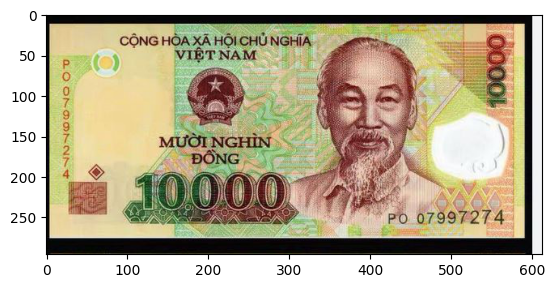

1/1 [==============================] - 0s 268ms/step
2
Tiền:  10k VNĐ


In [13]:
# Mở ảnh
img = Image.open('/content/drive/MyDrive/AI/bank_VN/Banknotes_Test/10k3.JPG')

# Resize ảnh về kích thước mong muốn
IMG = img
img = img.resize((60, 30))

# Chuyển đổi ảnh sang numpy array và chuẩn hóa
img = np.asarray(img)
img = img.reshape(1,60,30,3)
img = img.astype('float32') / 255.0

plt.imshow(IMG)
plt.show()

matrix = np.argmax(model.predict(img), axis=-1)
class_names = ["Không biết","5k VNĐ", "10k VNĐ","20k VNĐ","50k VNĐ","100k VNĐ","500k VNĐ"]
temp1 = matrix[0]
print(temp1)
print("Tiền: ", class_names[temp1])